In [73]:
import yfinance as yf
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  return  df.history(period="max")

In [9]:
df_moinho_dias_branco = get_yfinance('MDIA3.SA')

In [22]:
df_moinho_dias_branco.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [17]:
df_moinho_dias_branco.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-10-18 00:00:00-03:00,5.322892,5.424280,5.198690,5.335565,7977600,0.0,0.0
2006-10-19 00:00:00-03:00,5.348238,5.398933,5.279801,5.322892,1174800,0.0,0.0
2006-10-20 00:00:00-03:00,5.325425,5.386258,5.322891,5.386258,1079700,0.0,0.0
2006-10-23 00:00:00-03:00,5.383725,5.482579,5.335565,5.424280,992100,0.0,0.0
2006-10-24 00:00:00-03:00,5.424281,5.449627,5.386260,5.439489,287700,0.0,0.0


**Listando o nome das colunas do dataframe.**

In [15]:
print( f'Colunas do dataframe : {list(df_moinho_dias_branco.columns)}')


Colunas do dataframe : ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


In [20]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x , y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

**Outra api de verificar a correlacao**

In [77]:
def correlacao_com_pandas(title, dataset):
    ax = plt.figure(figsize=(12, 6))
    ax.suptitle(title, fontsize=18, x = 0.26, y=0.95)
    autocorrelation_plot(dataset)
    ax = ax

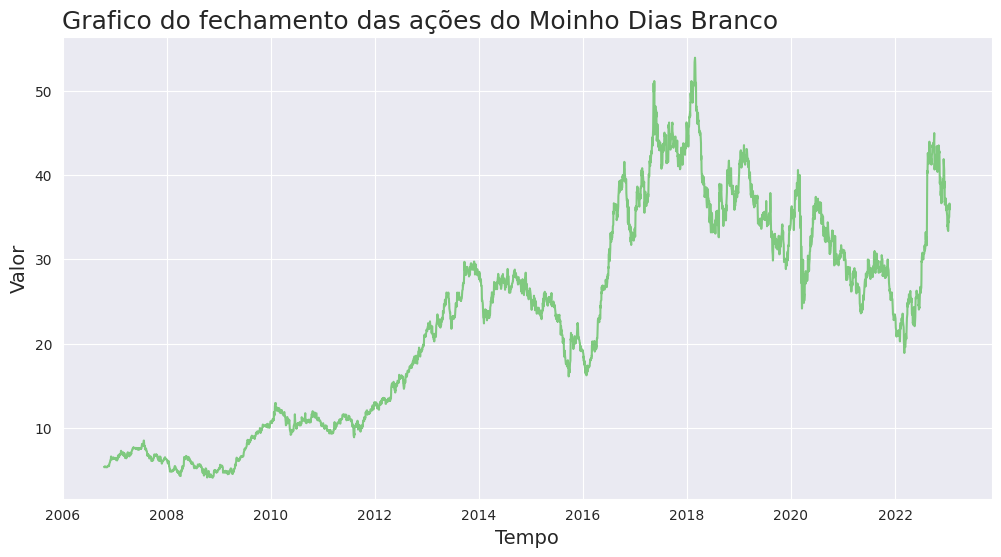

In [21]:
plotar('Grafico do fechamento das ações do Moinho Dias Branco', 'Tempo', 'Valor', 'Date', 'Close', df_moinho_dias_branco)

In [25]:
def show_trend(ts, ma_size):
  to_show = pd.DataFrame()

  to_show['serie'] = ts.values[ma_size:]
  to_show['MA']  = ts.rolling(ma_size).mean().values[ma_size:]
  to_show.plot()
  plt.show()

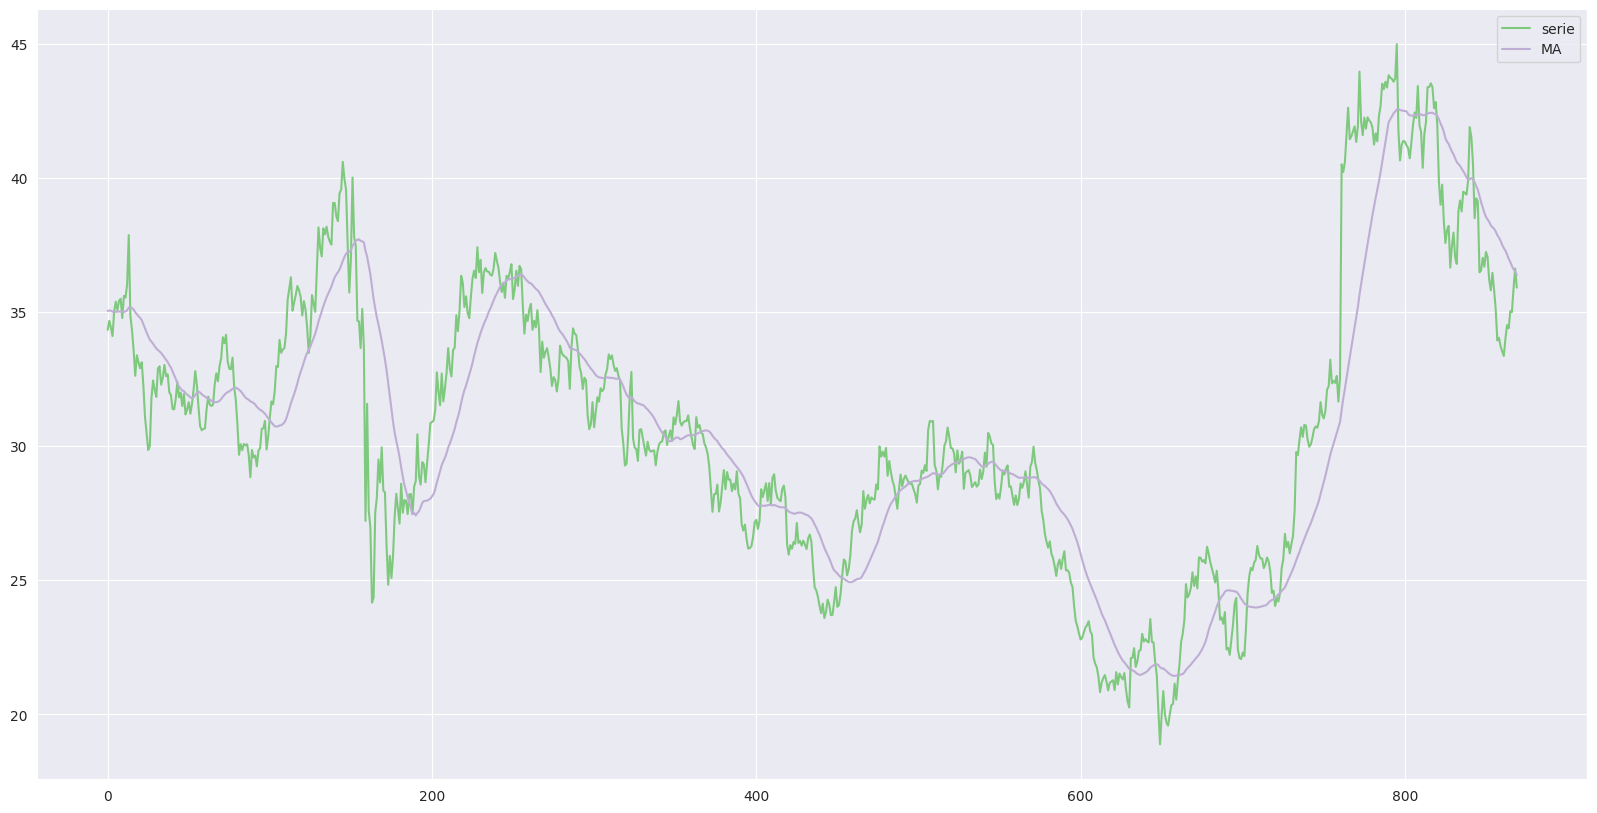

In [26]:
ts = df_moinho_dias_branco['Close'].iloc[-900:]
ma_size=30
show_trend(ts, ma_size)

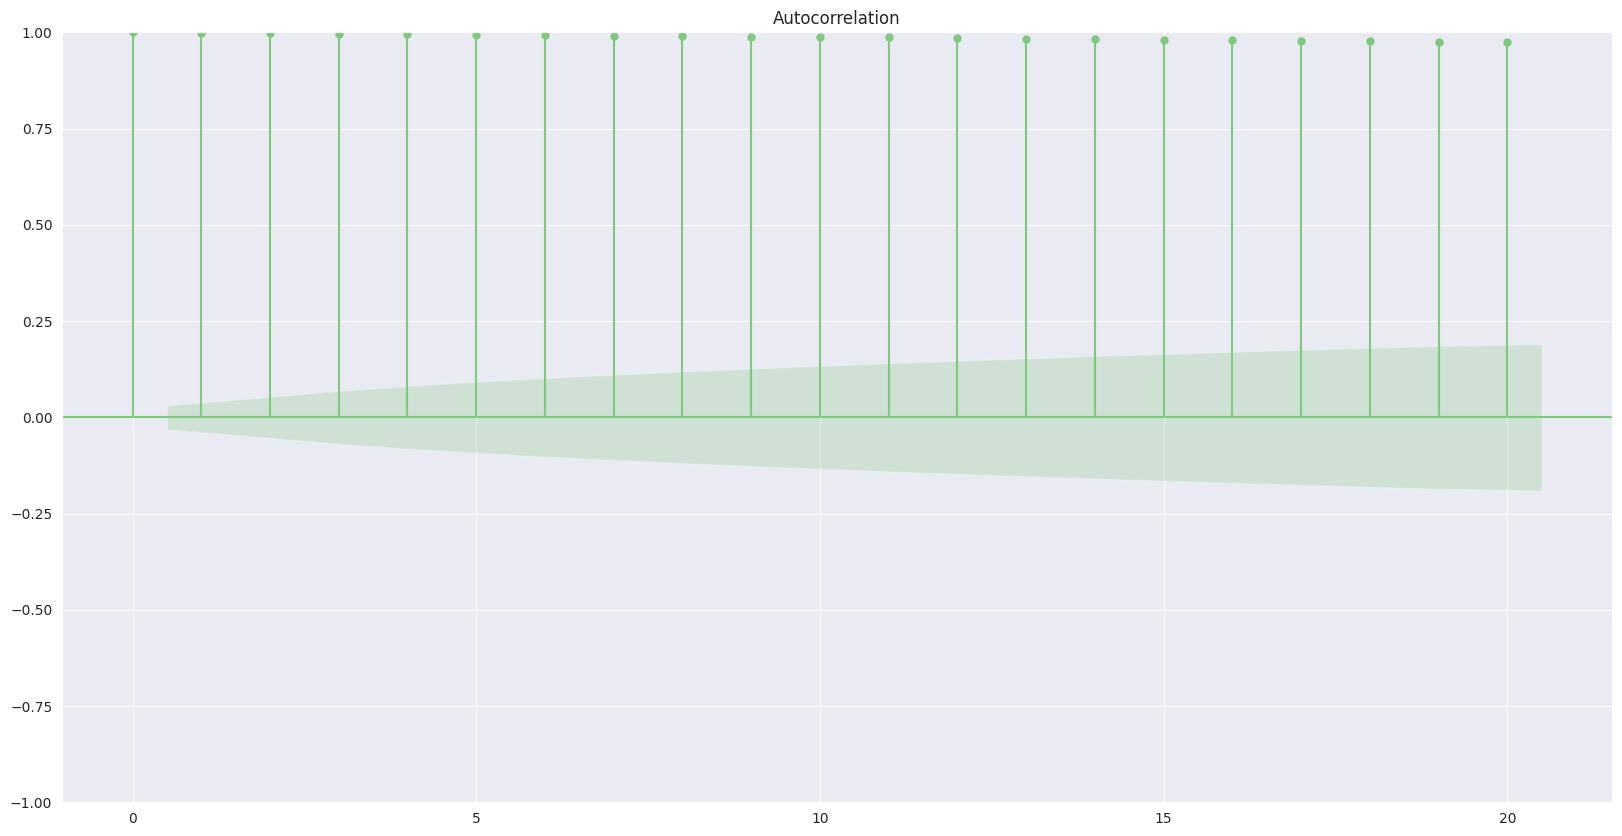

In [35]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_moinho_dias_branco['Close'].values.squeeze(), lags=20)
plt.show()

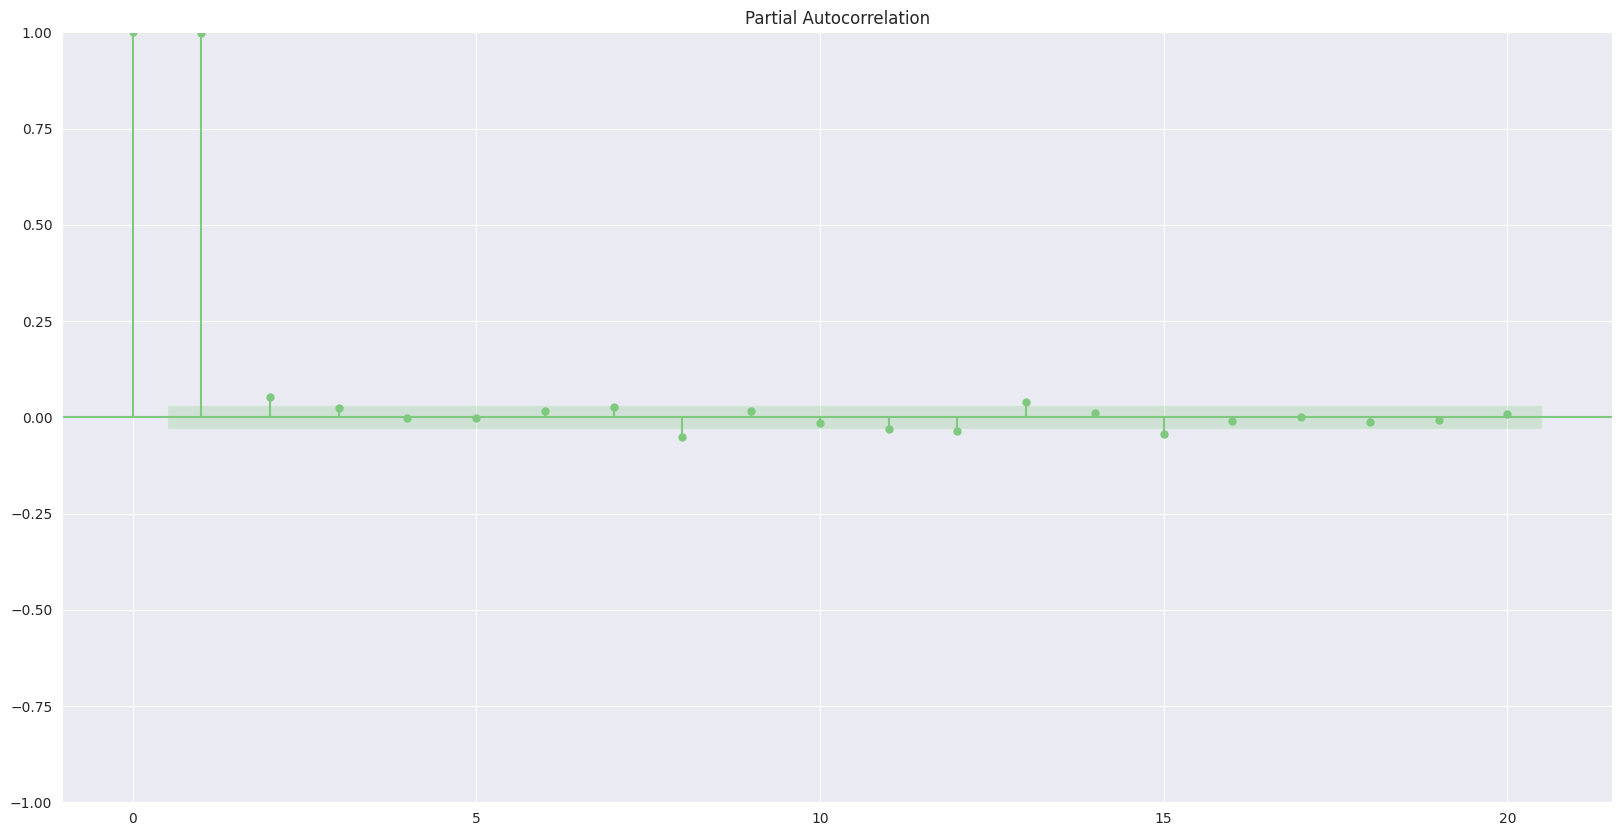

In [34]:
sm.graphics.tsa.plot_pacf(df_moinho_dias_branco['Close'].values.squeeze(), lags=20)
plt.show()

*Correlacao usando a biblioteca Pandas*

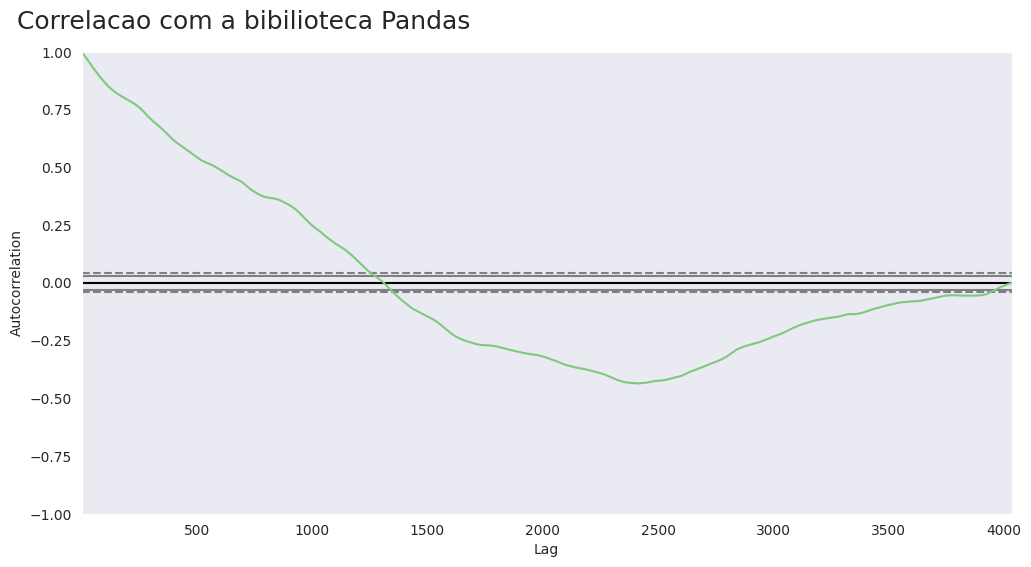

In [78]:
correlacao_com_pandas('Correlacao com a bibilioteca Pandas', df_moinho_dias_branco['Close'])

In [38]:
timeseries_titles = ['AirPassengers', 'nottem', 'ambientNOxCH', 'acme', 'sunspot.year', 'UKDriverDeaths', 
                    'USAccDeaths', 'UKgas', 'JohnsonJohnson', 'Nile', 'LakeHuron', 'austres', 
                    'lynx', 'deaths', 'drivers']
                    
df_sunspot_year = data('sunspot.year')

In [42]:
data('sunspot.year', show_doc=True )

sunspot.year

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Yearly Sunspot Data, 1700–1988

### Description

Yearly numbers of sunspots from 1700 to 1988 (rounded to one digit).

Note that monthly numbers are available as `sunspot.month`, though starting
slightly later.

### Usage

    sunspot.year

### Format

The univariate time series `sunspot.year` contains 289 observations, and is of
class `"ts"`.

### Source

H. Tong (1996) _Non-Linear Time Series_. Clarendon Press, Oxford, p. 471.

### See Also

For _monthly_ sunspot numbers, see `sunspot.month` and `sunspots`.

Regularly updated yearly sunspot numbers are available from WDC-SILSO, Royal
Observatory of Belgium, at http://www.sidc.be/silso/datafiles

### Examples

    utils::str(sm <- sunspots)# the monthly version we keep unchanged
    utils::str(sy <- sunspot.year)
    ## The common time interval
    (t1 <- c(max(start(sm), start(sy)),     1)) # Jan 1749
    (t2 <- c(min(  end(sm)[1

In [43]:
df_sunspot_year.head()

,time,sunspot.year
1,1700,5.0
2,1701,11.0
3,1702,16.0
4,1703,23.0
5,1704,36.0


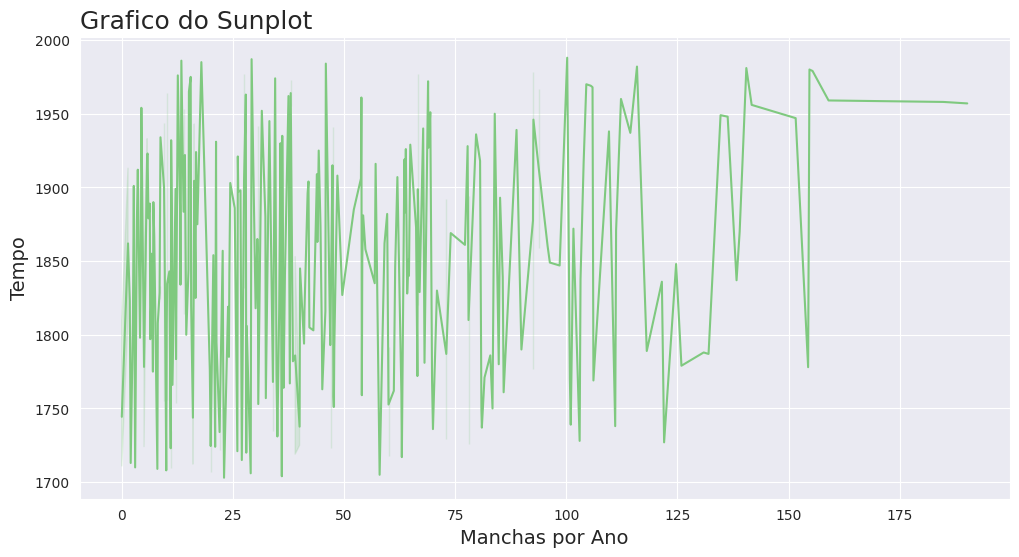

In [46]:
plotar('Grafico do Sunplot', 'Manchas por Ano', 'Tempo', 'sunspot.year', 'time', df_sunspot_year)

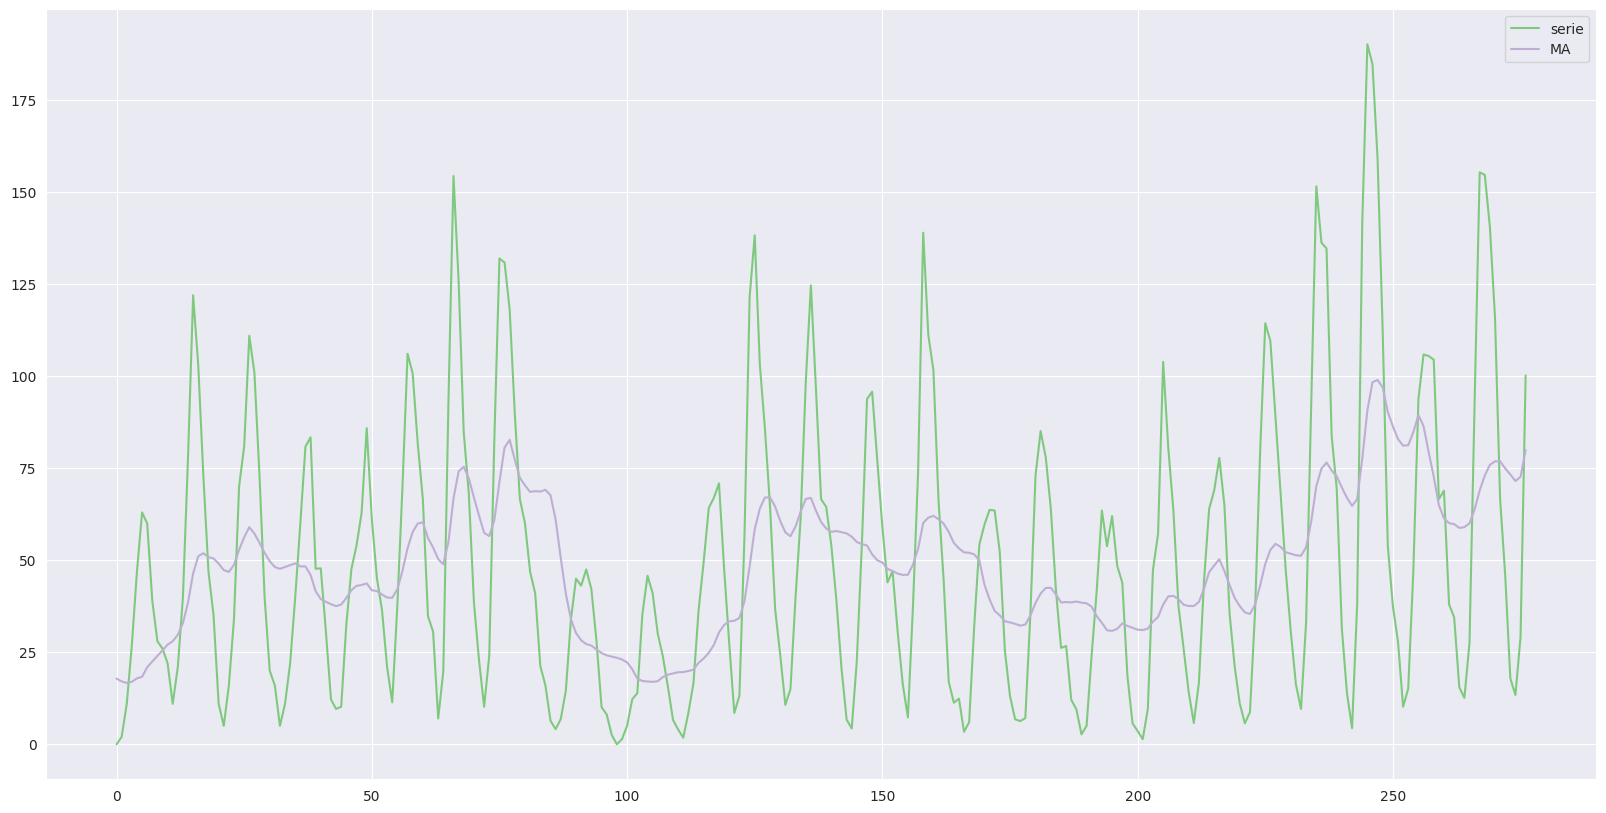

In [52]:
ts = df_sunspot_year['sunspot.year']
ma_size=12
show_trend(ts, ma_size)

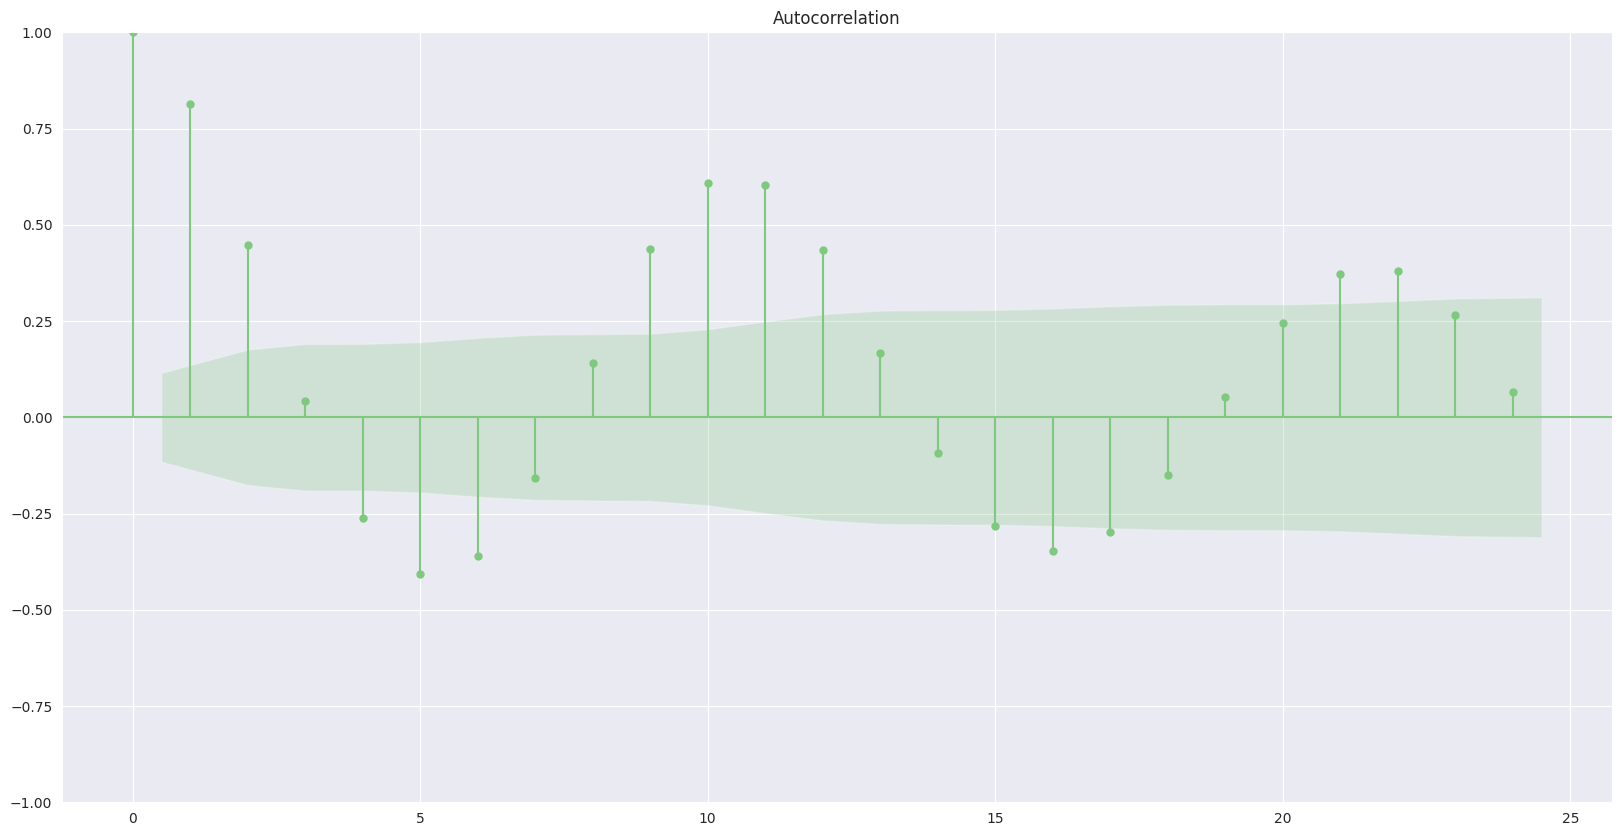

In [53]:
sm.graphics.tsa.plot_acf(df_sunspot_year['sunspot.year'].values.squeeze(), lags=24)

plt.show()

/home/rivaldojr/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


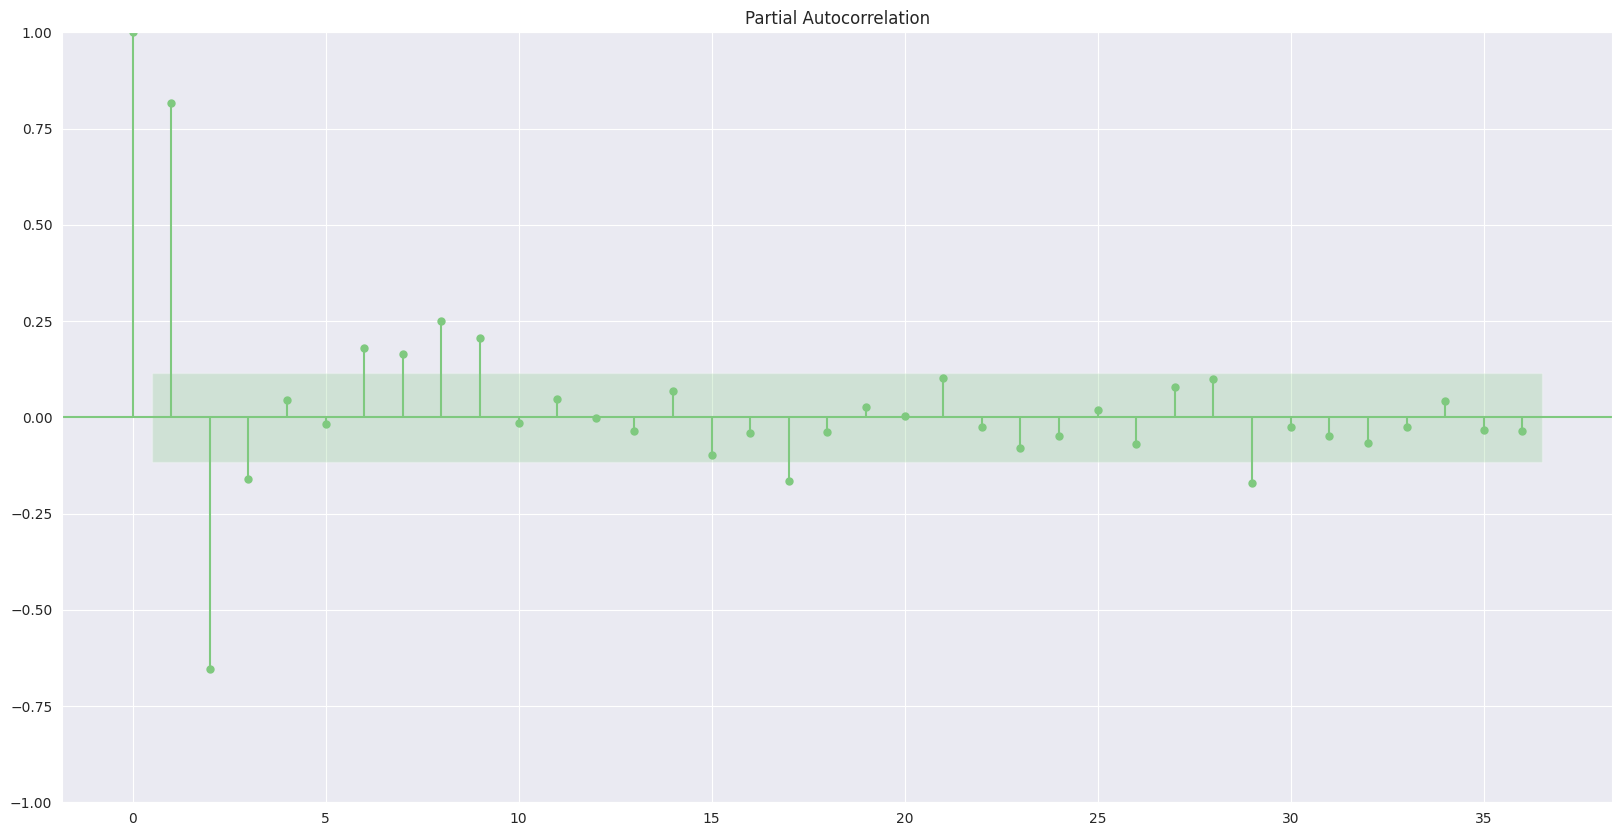

In [54]:
sm.graphics.tsa.plot_pacf(df_sunspot_year['sunspot.year'].values.squeeze(), lags=36)

plt.show()

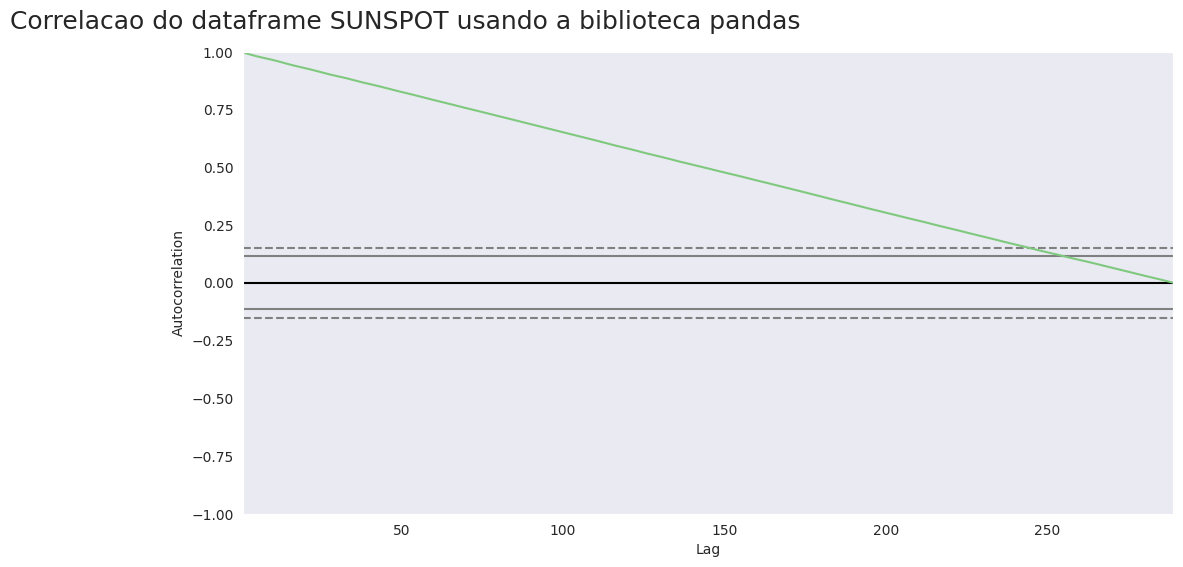

In [79]:
correlacao_com_pandas('Correlacao do dataframe SUNSPOT usando a biblioteca pandas', df_sunspot_year)

In [55]:
df_sem_nome = pd.read_csv('./dados/sem_nome.csv')
df_sem_nome.head

<bound method NDFrame.head of      Unnamed: 0    actual
0             0 -0.852753
1             1 -1.703346
2             2 -0.451841
3             3  0.392410
4             4  0.498923
..          ...       ...
995         995 -1.343438
996         996  0.199716
997         997  0.639731
998         998  1.013807
999         999  0.475834

[1000 rows x 2 columns]>

In [57]:
df_sem_nome.shape

(1000, 2)

In [59]:
list(df_sem_nome.columns)

['Unnamed: 0', 'actual']

In [61]:
df_sem_nome.head()

,Unnamed: 0,actual
0,0,-0.852753
1,1,-1.703346
2,2,-0.451841
3,3,0.392410
4,4,0.498923


In [62]:
df_sem_nome.rename(columns={'Unnamed: 0': 'indice', 'actual': 'atual'}, inplace=True)

In [63]:
df_sem_nome.head()

,indice,atual
0,0,-0.852753
1,1,-1.703346
2,2,-0.451841
3,3,0.392410
4,4,0.498923


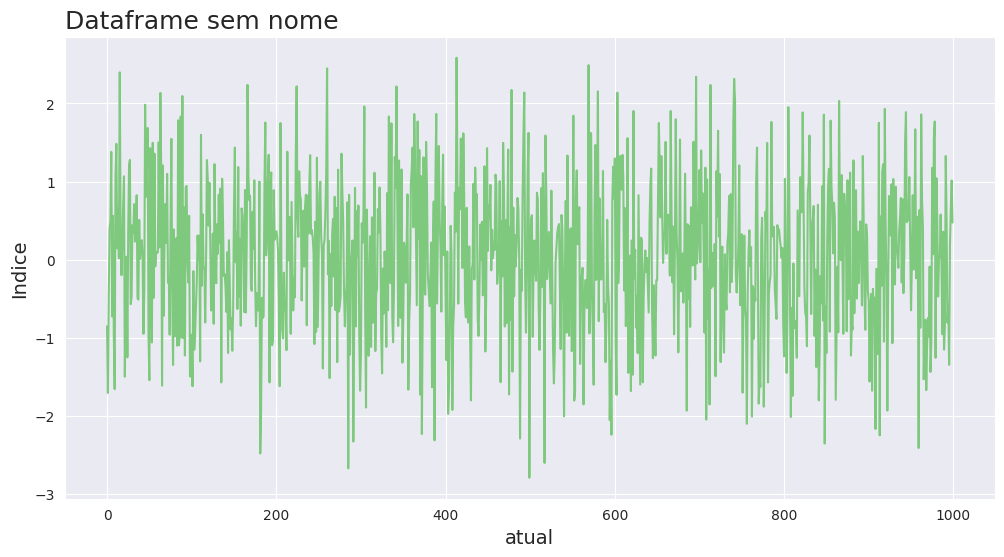

In [64]:
plotar('Dataframe sem nome', 'atual', 'Indice', 'indice', 'atual', df_sem_nome)

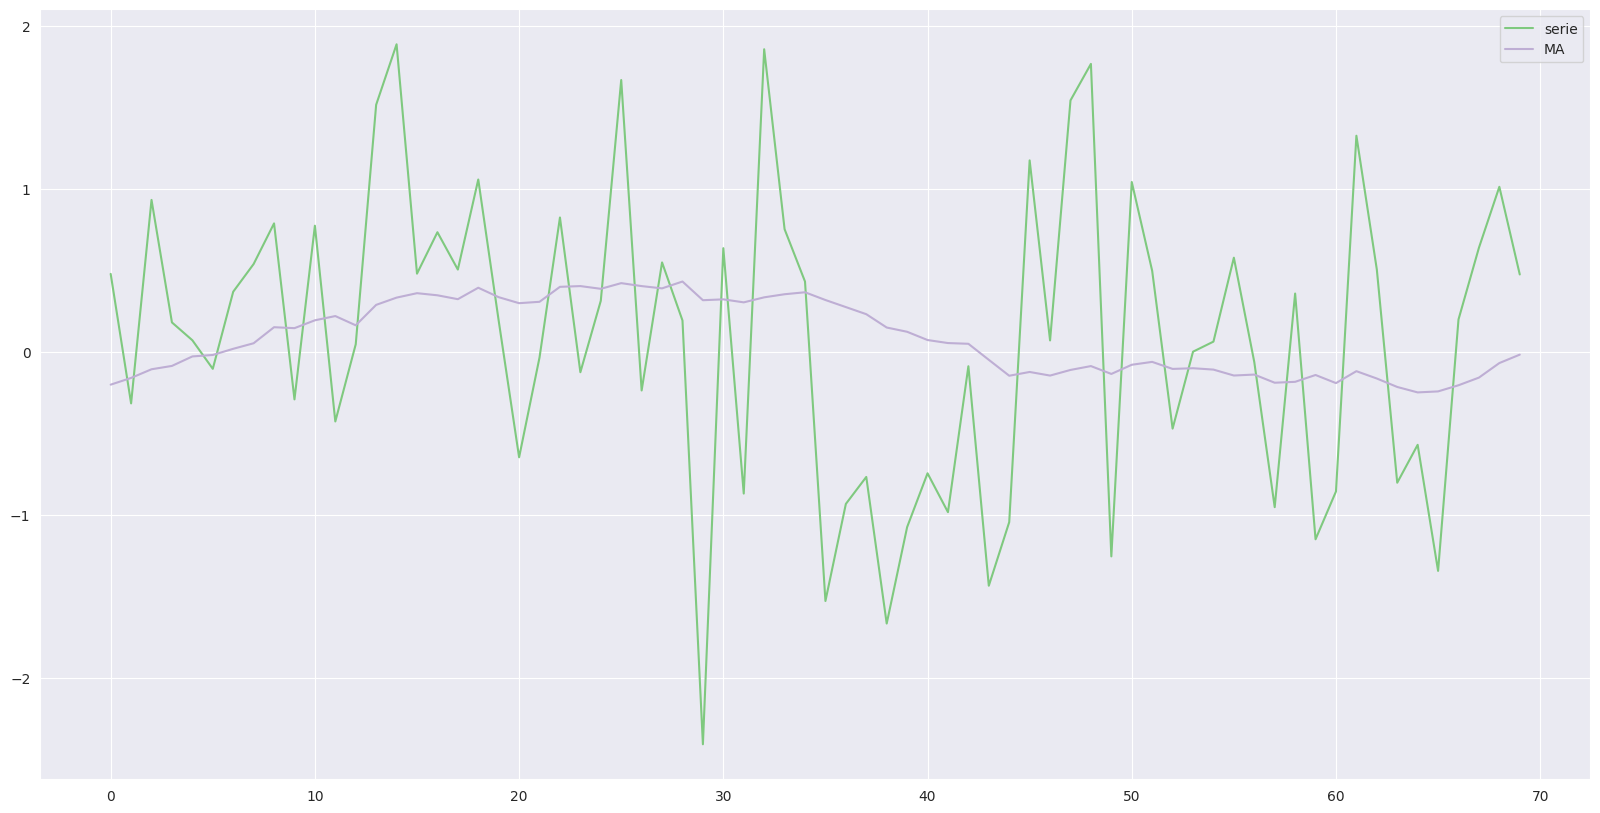

In [69]:
ts = df_sem_nome['atual'].iloc[-100:]
ma_size=30
show_trend(ts, ma_size)

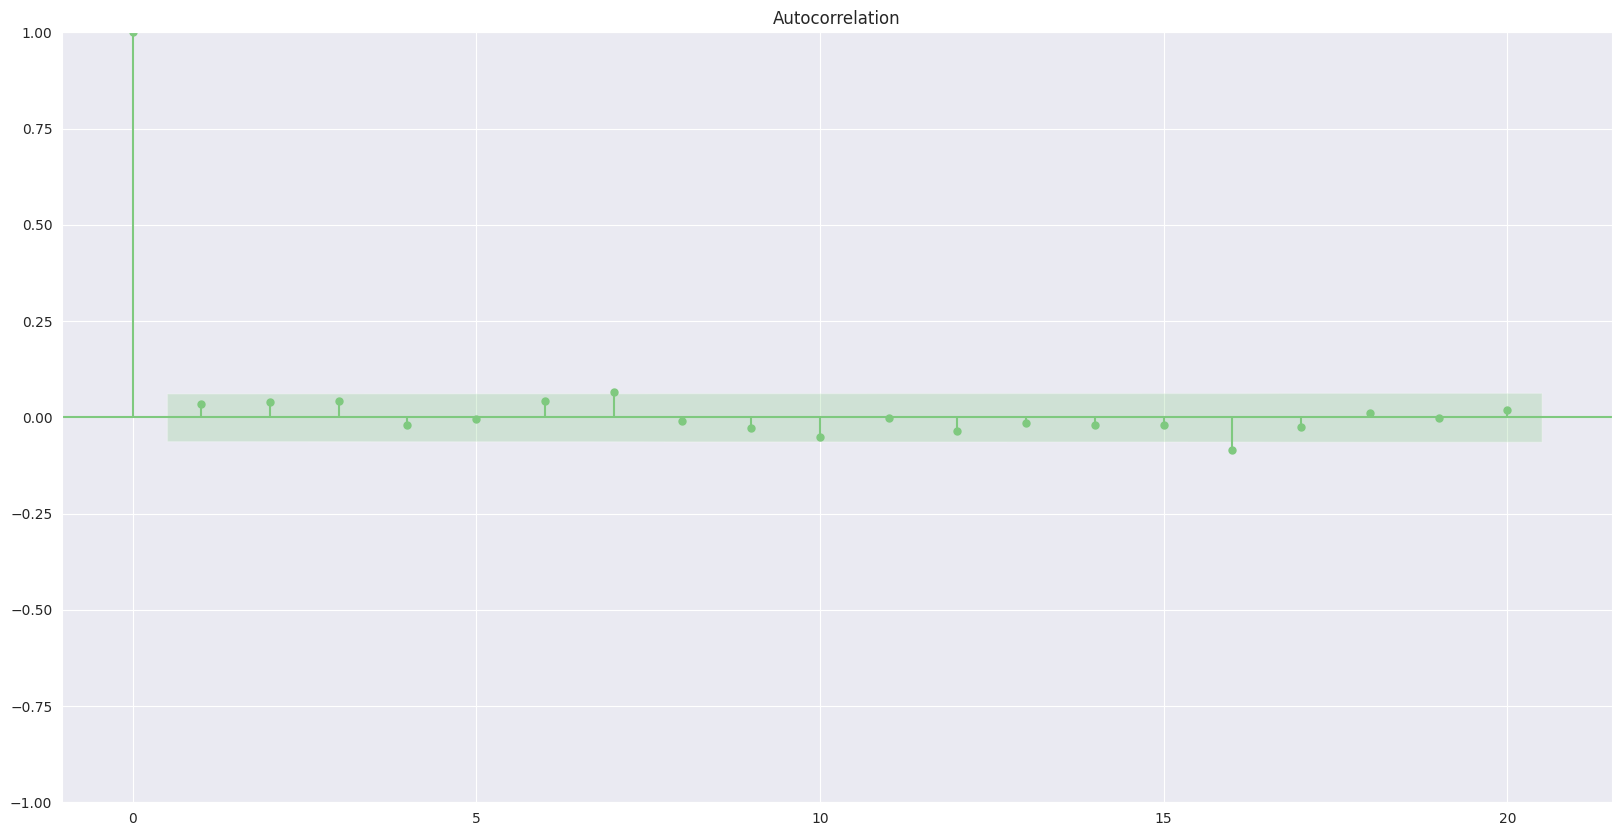

In [70]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_sem_nome['atual'].values.squeeze(), lags=20)
plt.show()

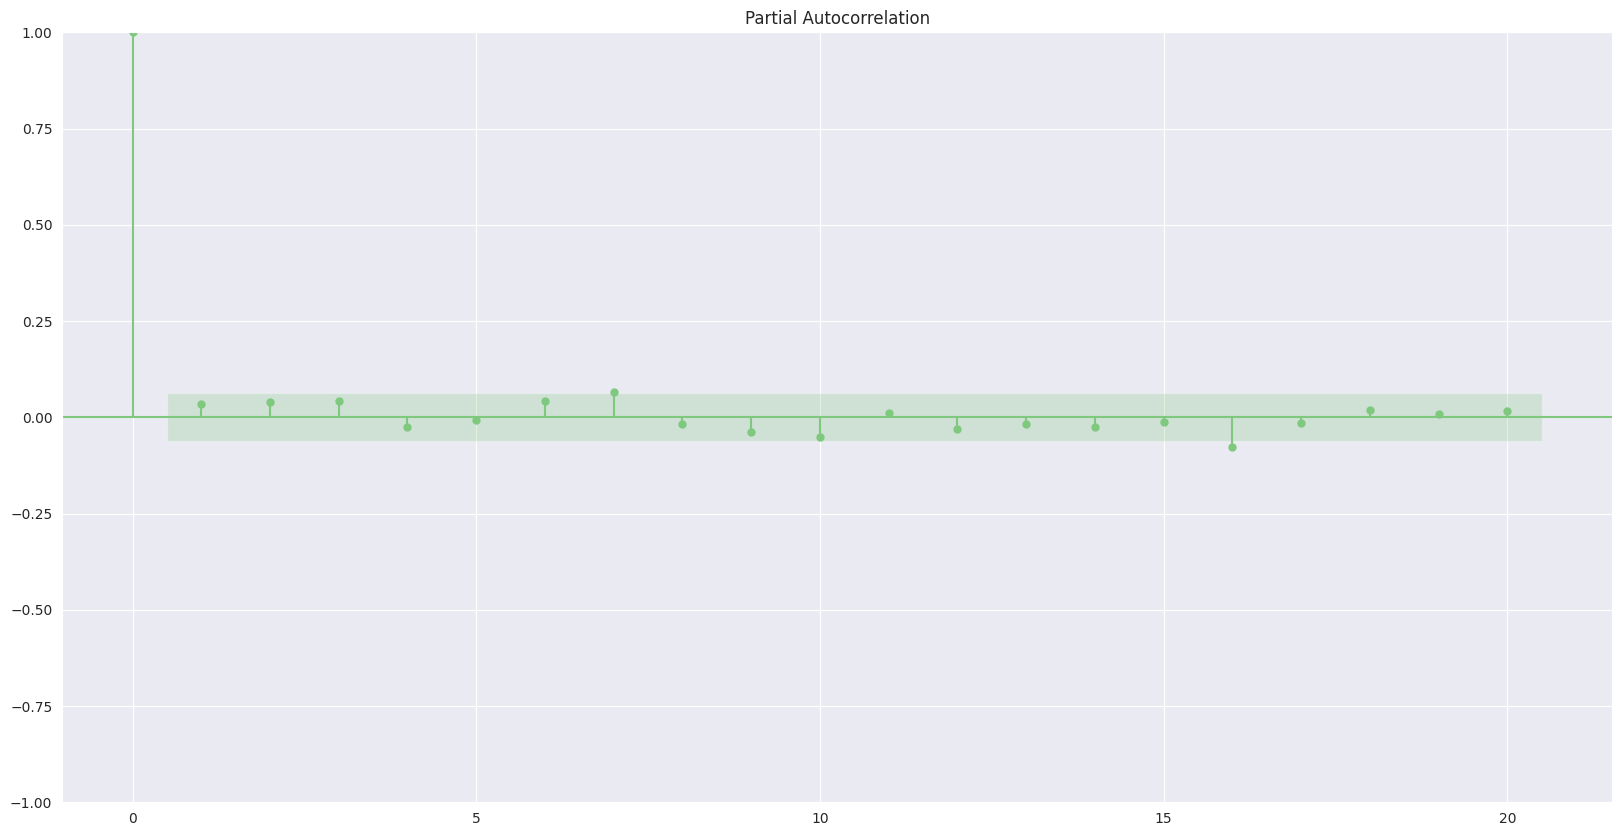

In [72]:
sm.graphics.tsa.plot_pacf(df_sem_nome['atual'].values.squeeze(), lags=20)
plt.show()

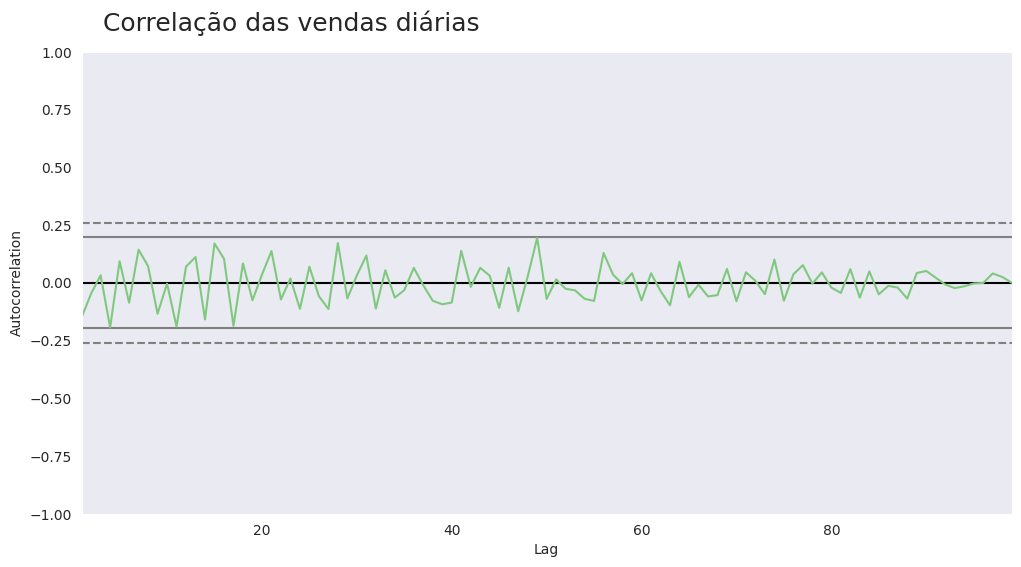

In [76]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x = 0.3, y=0.95)
autocorrelation_plot(df_sem_nome['atual'][1:100])
ax = ax